# K Nearest Neighbors
(**KNN**) A simple supervised learning algorithm used in Machine Learning for regression and calssification problems. KNN algorithms use data and classify new data points based on similarity measures. The distance formula is used to measure the distance between the points.

\begin{align}
d(\mathbf{p,q}) = d(\mathbf{q,p}) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 +\cdots+(q_n - p_n)^2} 
\end{align}
\begin{align}= \sqrt{\sum\limits_{i=1} ^{n} (q_i - p_i)^2}
\end{align}

In [2]:
using RDatasets
using DataFrames
using CSV
using Plots

## Algortihm
1. Load data
2. Choose number of $k$ neighbors
3. Calculate distance from desired points to all points in dataset
4. Sort Results
5. Choose smallest $k$
6. Evaluate target for neighbors
7. Get most frequent target
8. Make that your prediction for point

In [3]:
iris = dataset("datasets", "iris")
x_data = [x for x in zip(iris.SepalLength, iris.PetalLength, iris.PetalWidth)]
y_data = [iris.Species[i] for i = 1:150];

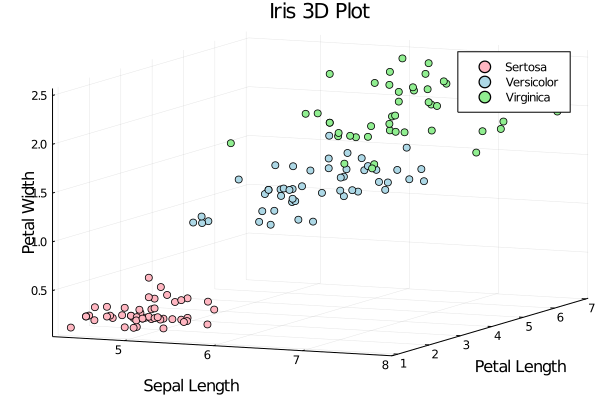

In [4]:
scatter(xaxis = "Sepal Length",
        yaxis = "Petal Length",
        zaxis = "Petal Width",
        title = "Iris 3D Plot")

scatter!(x_data[1:50],
        label = "Sertosa",
        color = "lightpink")

scatter!(x_data[51:100],
        label = "Versicolor",
        color = "lightblue")

scatter!(x_data[101:150],
        label = "Virginica",
        color = "lightgreen")

In [5]:
function distance(p1, p2)
    return sqrt(sum((p1[i] - p2[i])^2 for i = 1:length(p1)))
end

println("The test between ", x_data[1], " and", x_data[50])
println(" is ", distance(x_data[1], x_data[50]));

The test between (5.1, 1.4, 0.2) and(5.0, 1.4, 0.2)
 is 0.09999999999999964


In [6]:
function KNN(p, features, labels, k)
    distance_array = [(distance(p, features[i]), labels[i]) for i = 1:length(features)]
    sort!(distance_array, by = x -> x[1])
    
    return distance_array[1:k]
end

KNN (generic function with 1 method)

In [7]:
function KNN_iris_predcitor(p, features, labels, k)
    neighbors = KNN(p, features, labels, k)
    setosa_count = [1.0 for x in neighbors if x[2] == "setosa"]
    versicolor_count = [1.0 for x in neighbors if x[2] == "versicolor"]
    virginica_count = [1.0 for x in neighbors if x[2] == "virginica"]
    
    temp_list = [("setosa", setosa_count), ("versicolor", versicolor_count), ("virginica", virginica_count)]
    sort!(temp_list, by = x -> x[2])
    
    return temp_list[end][1]
end



KNN_iris_predcitor (generic function with 1 method)

In [8]:
KNN_iris_predcitor(x_data[120], x_data, y_data, 5)

"versicolor"

---

In [9]:
function k_nearest_neighbors(p, X, Y, k)
    distance_array = [(X[i], Y[i], distance(p, X[i]))
                        for i = 1:length(X)
                        if X[i] != p
            ]
    sort!(distance_array, by = x -> x[3])
    return distance_array[1:k]
end

test = k_nearest_neighbors(x_data[130], x_data, y_data, 5)

println(" ")
println("Target point P = ", x_data[130])
println("k = ", 5)
println("___________________________")
for i = 1:length(test)
    println("Point $i = ", test[i][1])
    println("Point label = ", test[i][2])
    println("Point distance = ", test[i][3])
    if i != length(test)
        println(" ")
    else
        println("___________________")
    end
end
println(" ")

 
Target point P = (7.2, 5.8, 1.6)
k = 5
___________________________
Point 1 = (7.2, 6.0, 1.8)
Point label = virginica
Point distance = 0.28284271247461906
 
Point 2 = (7.4, 6.1, 1.9)
Point label = virginica
Point distance = 0.4690415759823428
 
Point 3 = (7.1, 5.9, 2.1)
Point label = virginica
Point distance = 0.5196152422706635
 
Point 4 = (6.7, 5.8, 1.8)
Point label = virginica
Point distance = 0.5385164807134504
 
Point 5 = (7.3, 6.3, 1.8)
Point label = virginica
Point distance = 0.5477225575051661
___________________
 


In [10]:
function predict(index::Int64, X, Y, k; point_color = "red", show_img = false)
    point = X[index]
    neighbors = k_nearest_neighbors(point, X, Y, k)
    setosa_count = sum([1 for x in neighbors if x[2] == "setosa"])
    versicolor_count = sum([1 for x in neighbors if x[2] == "versicolor"])
    virginica_count = sum([1 for x in neighbors if x[2] == "virginica"])
    
    if show_img == true
        scatter(xaxis = "Sepal Length",
                yaxis = "Petal Length",
                zaxis = "Petal Width",
                title = "Iris Data KNN 3D Plot")
        for x in neighbors
            plot!([point, x[1]], color = point_color, label = false)
        end
    end
    
    if show_img == true
        scatter!(X[1:50],
        label = "setosa",
        color = "lightpink")
        scatter!(X[51:100],
        label = "versicolor",
        color = "lightblue")
        scatter!(X[101:150],
        label = "virginica",
        color = "lightgreen")
        scatter!(point, color = point_color, label = "target")
    end
    
    
     println("     P(setosa)       |       P(versicolor)     |     P(virginica)")
    println("------------------------------------------------------------------")
    print("        ", setosa_count // k,"        |             ", versicolor_count//k)
    print("        |        ", virginica_count//k)
    println(" ")
    println()
    
    
    if show_img == true
            scatter!()
    end
end

predict (generic function with 1 method)

     P(setosa)       |       P(versicolor)     |     P(virginica)
------------------------------------------------------------------
        1//20        |             19//20        |        0//1 



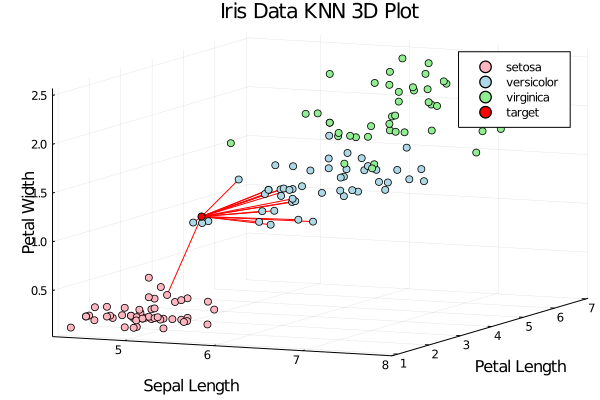

In [11]:
predict(99, x_data, y_data, 20, show_img = true)